## Explatory Data Analysis

In [4]:
import sys
sys.path.append('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/')

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from scipy.fft import fft
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')



### Load Data

Load the dataset from 7 stations for all the period. Also apply a min-max scaler for each sniplet in preprocessing

In [15]:
data_dir = '/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/processed/I06AU_FULL'

# List to hold individual DataFrames from each CSV file
dataframes_list = []

# Create a MinMaxScaler instance (initially, we don't fit it)
scaler = MinMaxScaler()

# Iterate over each file in the folder
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):  # Check if the file is a CSV
        try:
            file_path = os.path.join(data_dir, filename)
            df = pd.read_csv(file_path)

            # Isolate the sensor data (excluding the timestamp column)
            sensor_data = df.drop(columns=[df.columns[0]])
            
            # Normalize the sensor data
            normalized_sensor_data = scaler.fit_transform(sensor_data)

            # Create a DataFrame from the normalized data
            normalized_df = pd.DataFrame(normalized_sensor_data, columns=sensor_data.columns)

            # Combine the timestamp column with the normalized data
            combined_df = pd.concat([df[[df.columns[0]]], normalized_df], axis=1)

            dataframes_list.append(combined_df)
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Concatenate all the DataFrames in the list into a single DataFrame
all_data = pd.concat(dataframes_list, ignore_index=True)

In [16]:
all_data = all_data.drop(columns=['I06H5'])
all_data = all_data.rename(columns={'Unnamed: 0': 'Datetime'})

In [17]:
all_data.describe()

,I06H1,I06H2,I06H3,I06H4,I06H6,I06H7,I06H8
count,2.215781e+07,2.215781e+07,2.215771e+07,2.215781e+07,2.215781e+07,2.215781e+07,2.215781e+07
mean,4.669224e-01,5.008202e-01,4.872066e-01,4.925160e-01,4.833153e-01,4.950218e-01,5.009877e-01
std,6.097604e-02,6.357605e-02,6.062666e-02,5.500297e-02,5.063696e-02,5.404295e-02,6.206749e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.470663e-01,4.573523e-01,4.499062e-01,4.640432e-01,4.546752e-01,4.531136e-01,4.591889e-01
50%,4.788840e-01,5.059776e-01,4.951418e-01,4.997378e-01,4.857516e-01,4.982943e-01,5.084390e-01
75%,5.053981e-01,5.376912e-01,5.295722e-01,5.251561e-01,5.069868e-01,5.321318e-01,5.411298e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [18]:
all_data.head()

,Datetime,I06H1,I06H2,I06H3,I06H4,I06H6,I06H7,I06H8
0,2018-11-30 21:34:30.850,0.549418,0.769161,0.749032,0.560235,0.830333,0.561528,0.305792
1,2018-11-30 21:34:30.900,0.560136,0.711171,0.778353,0.543482,0.721405,0.699876,0.321785
2,2018-11-30 21:34:30.950,0.499783,0.624356,0.770324,0.549336,0.691421,0.711238,0.354972
3,2018-11-30 21:34:31.000,0.440276,0.571667,0.724349,0.596606,0.680094,0.579726,0.310757
4,2018-11-30 21:34:31.050,0.389760,0.561136,0.676298,0.649180,0.589208,0.428782,0.197671


In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22157812 entries, 0 to 22157811
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Datetime  object 
 1   I06H1     float64
 2   I06H2     float64
 3   I06H3     float64
 4   I06H4     float64
 5   I06H6     float64
 6   I06H7     float64
 7   I06H8     float64
dtypes: float64(7), object(1)
memory usage: 1.3+ GB


### Data Splitting

In [20]:
# Sort the data by timestamp
all_data = all_data.sort_values(by='Datetime')

# Determine the number of rows for each set (e.g., 80% train, 20% test)
total_rows = all_data.shape[0]
train_size = int(total_rows * 0.80)
test_size = int(total_rows * 0.20)

In [21]:
# Split the data
train_data = all_data.iloc[:train_size]
test_data = all_data.iloc[train_size:]

In [22]:
# Define the directory paths
base_dir = '/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data'  # Base directory path
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Save each split of the data
train_data.to_csv(os.path.join(train_dir, 'train_data.csv'), index=False)
test_data.to_csv(os.path.join(test_dir, 'test_data.csv'), index=False)


### Visualization

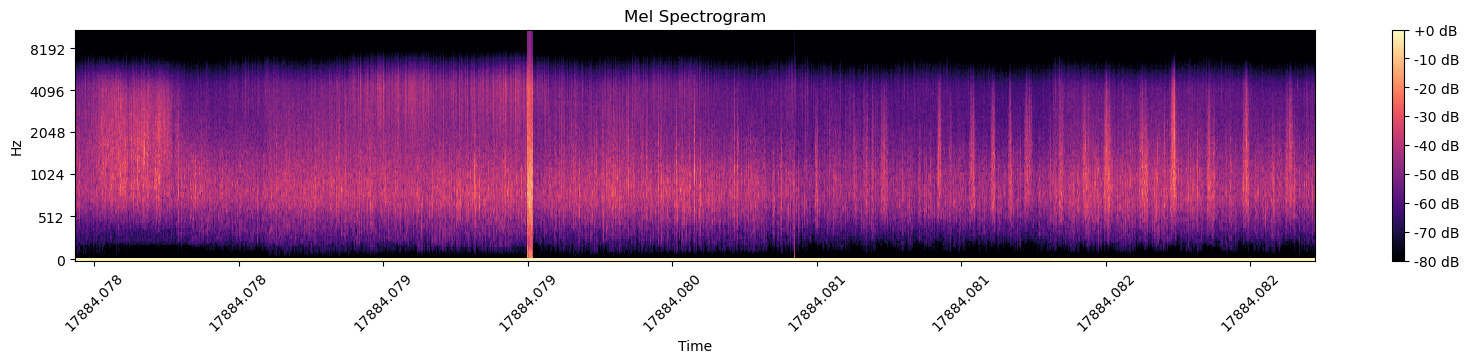

In [11]:
# Replace with the actual file path and column name
file_path = '/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/train/train_data.csv'
data = pd.read_csv(file_path)
data['Datetime'] = pd.to_datetime(data['Datetime'])  # Ensure datetime is correctly parsed

# Selecting a specific time window
start_time = '2018-12-19 00:00:00'  # Adjust to your desired start time
end_time = '2018-12-27 23:59:59'    # Adjust to your desired end time
selected_data = data[(data['Datetime'] >= start_time) & (data['Datetime'] <= end_time)]

# Assuming the sensor data for one station is in a column named 'sensor_column_name'
sensor_data = selected_data['I06H1']

# Convert the Pandas series to a NumPy array
sensor_data_array = sensor_data.to_numpy()

# Parameters for Mel Spectrogram
n_mels = 128
hop_length = 512
n_fft = 2048
sampling_rate = 22050  # Adjust the sampling rate as per your data

# Convert to Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=sensor_data_array, sr=sampling_rate, n_mels=n_mels, hop_length=hop_length, n_fft=n_fft)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Calculate the duration of each frame in the Mel Spectrogram
frame_duration = hop_length / sampling_rate  # Duration of each frame in seconds

# Create a time array that corresponds to the frames of the Mel Spectrogram
mel_times = np.arange(mel_spectrogram_db.shape[1]) * frame_duration

# Convert this to match the datetime range of the selected data
datetime_range = pd.date_range(start=selected_data['Datetime'].iloc[0], 
                               periods=len(mel_times), 
                               freq=pd.DateOffset(seconds=frame_duration))

# Visualization
plt.figure(figsize=(20, 3))
librosa.display.specshow(mel_spectrogram_db, x_coords=datetime_range, sr=sampling_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()